In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [20]:
sent50 = pd.read_csv('generic_sentiment_dataset_50k.csv')
display(sent50.head())
display(sent50.shape)

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


(50000, 3)

In [21]:
sent10 = pd.read_csv('generic_sentiment_dataset_10k.csv')
display(sent10.head())
display(sent10.shape)

,sentiment,text,label
0,neutral,Camera good,1
1,negative,OMG! I KNOW! I give myself a stroke everytim...,0
2,neutral,Good,1
3,positive,The company recorded revenues of E658 .1 milli...,2
4,positive,All is good,2


(10000, 3)

In [22]:
sentDF = pd.concat([sent50,sent10])
display(sentDF.head())
display(sentDF.shape)

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


(60000, 3)

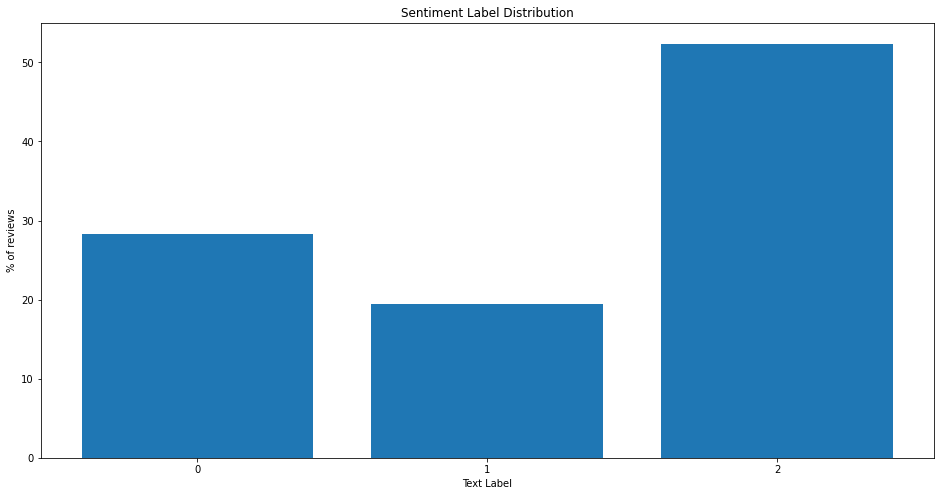

In [28]:
values, counts = np.unique(sentDF['label'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure(figsize = (16,8))
plt.bar(values, normalized_counts*100)
plt.xlabel('Text Label')
plt.xticks([0,1,2])
plt.ylabel('% of Reviews')
plt.title("Sentiment Label Distribution")
plt.show()

In [29]:
X = sentDF['text']
y = sentDF['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [55]:
sentWords = CountVectorizer(min_df = 50, stop_words='english')
sentWords.fit(X_train)
sentWordsTransform = sentWords.transform(X_train)
sentWordsDF = pd.DataFrame(columns = sentWords.get_feature_names(), data = sentWordsTransform.toarray())
display(sentWordsDF)

,00,000,10,100,10000,10k,11,12,128,128gb,...,year,years,yelp,yes,yesterday,youtube,yum,yummy,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


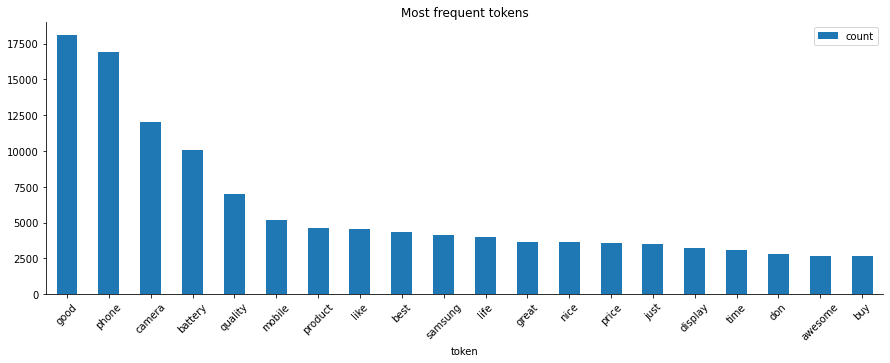

In [56]:
word_counts = sentWordsTransform.toarray().sum(axis=0)
words = sentWords.get_feature_names()

def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
    return words_df
    
wrodsDF = plot_most_frequent(words, word_counts)

In [61]:
%%time
valScores = []
trainScores = []
cVals = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=12)
    my_logreg.fit(X_train,y_train)
    
    trainScores.append(my_logreg.score(X_train,y_train))
    valScores.append(my_logreg.score(X_val,y_val))
    cVals.append(c)

ValueError: could not convert string to float: 'Very poor product.Touch not work properly and camera is not like as 48mp.Fastcharging also not support.'